 Verificação de Aprendizagem - Machine Learning

## Experimentos

### Carregando os Dados

In [1]:
import pandas as pd
import numpy as np
import re

import unicodedata
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
    w = w.strip().lower()

    # creating a space between a word and the punctuation following it eg: "he is a boy." => "he is a boy ."
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping
    # -punctuation
    w = re.sub(r"([?.!,¿#@0-9])", r"", w)

    return w

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [4]:
!mkdir datasets/

In [5]:
!curl https://raw.githubusercontent.com/Tiagoblima/bracis-2021-language/main/datasets/samples.csv?token=AH4TM4RHFXA6DCCCHVBLUJLBEAU2O --output datasets/samples.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  759k  100  759k    0     0  2703k      0 --:--:-- --:--:-- --:--:-- 2703k


In [6]:
samples = pd.read_csv('datasets/samples.csv')
X = samples['TEXT'].apply(preprocess_sentence).to_numpy()
y = samples['LANG'].to_numpy()


In [7]:
tfidf_word = TfidfVectorizer(analyzer='word', ngram_range=(2, 3))
X_word_transformed = tfidf_word.fit_transform(X)

tfidf_char = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
X_char_transformed = tfidf_char.fit_transform(X)
X_char_transformed.shape

(2600, 18573)

### Análise Usando TSNE

Em análise preliminar, pode-se ver na figura a disposição dos idiomas em uma projeção 2D. 
Foi utilizado *t-distributed Stochastic Neighbor Embedding* (TSNE) para a redução da dimensionalidade e uma visualização dos dados.
Essa é uma forma bastante popular para visualização de dados em alta-dimensionalidade.
Nessa técnica os objetos são distribuídos de tal forma que pares semelhantes tem uma alta probabilidade na distribuição.
O modelo é treinado para minimizar a divergência em Kullback-Leibler *van2014accelerating*.
Após a redução da dimensionalidade das originais 18095 para apenas duas,  os dados foram postos em uma escala entre 0 e 1.

In [8]:

X_word_embedded = TSNE(n_components=2).fit_transform(X_word_transformed)    
X_char_embedded = TSNE(n_components=2).fit_transform(X_char_transformed)    

X_word_embedded.shape

(2600, 2)

### Normalizando 

Aqui os dados são colocados entre 0 e 1

### Visalização 

Em análise preliminar, pode-se ver na figura a disposição dos idiomas em uma projeção 2D. 
Foi utilizado (TSNE) para a redução da dimensionalidade e uma visualização dos dados.
Essa é uma forma bastante popular para visualização de dados em alta-dimensionalidade.
Nessa técnica os objetos são distribuídos de tal forma que pares semelhantes tem uma alta probabilidade na distribuição.
O modelo é treinado para minimizar a divergência em Kullback-Leibler *van2014accelerating*.
Após a redução da dimensionalidade das originais 18095 para apenas duas,  os dados foram postos em uma escala entre 0 e 1.

In [9]:
word_df = pd.DataFrame(X_word_embedded, columns=['D1', 'D2'])
word_df['Language'] = y
word_df['analyzer'] = 'word'

word_df

,D1,D2,Language,analyzer
0,13.073373,-10.918736,apalai,word
1,10.217758,-15.877503,apalai,word
2,14.697562,-13.130646,apalai,word
3,9.149970,-9.132643,apalai,word
4,16.214901,-18.344967,apalai,word
...,...,...,...,...
2595,4.497572,-42.233845,xavante,word
2596,1.050708,-3.918454,xavante,word
2597,3.111845,-46.400101,xavante,word
2598,8.290064,-43.768147,xavante,word


In [10]:
char_df = pd.DataFrame(X_char_embedded, columns=['D1', 'D2'])
char_df['Language'] = y
char_df['analyzer'] = 'char'
char_df

,D1,D2,Language,analyzer
0,2.750296,-23.321472,apalai,char
1,2.009680,-25.692892,apalai,char
2,5.838439,-27.041538,apalai,char
3,2.305136,-24.834330,apalai,char
4,2.980181,-23.660078,apalai,char
...,...,...,...,...
2595,-27.680449,-38.008068,xavante,char
2596,-27.277212,-36.594456,xavante,char
2597,-27.193935,-39.597919,xavante,char
2598,-26.758993,-36.716171,xavante,char


In [11]:
df = pd.concat([word_df, char_df])
df

,D1,D2,Language,analyzer
0,13.073373,-10.918736,apalai,word
1,10.217758,-15.877503,apalai,word
2,14.697562,-13.130646,apalai,word
3,9.149970,-9.132643,apalai,word
4,16.214901,-18.344967,apalai,word
...,...,...,...,...
2595,-27.680449,-38.008068,xavante,char
2596,-27.277212,-36.594456,xavante,char
2597,-27.193935,-39.597919,xavante,char
2598,-26.758993,-36.716171,xavante,char


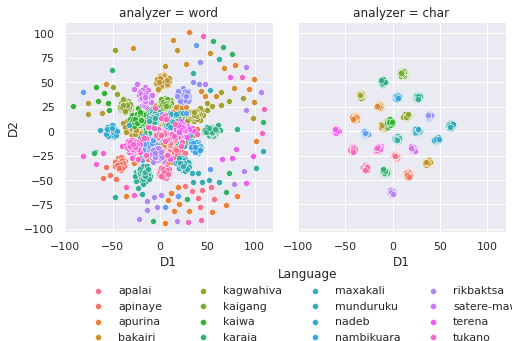

In [12]:
import matplotlib.pyplot as plt

import seaborn as sns


sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10.,10)})
g = sns.FacetGrid(df, col="analyzer", hue="Language", height=4,
                       legend_out=True)
g.map(sns.scatterplot, "D1", "D2")
g.add_legend(loc='lower center',
             bbox_to_anchor=(0.3, -0.2),
             
          ncol=4)

plt.savefig('tsne_vis.pdf')

### Preprocessando e Extraindo Features

In [13]:
CLFS_LIST = [('Word TFIDF+LinearSVC',  Pipeline([('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(2, 3))), ('svc', LinearSVC())])),
             ('Word TFIDF+MultinomialNB',Pipeline([('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(2, 3))), ('multinomialnb', MultinomialNB())])),
             ('Word TFIDF+LogisticRegression',Pipeline([('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(2, 3))), ('multinomialnb', LogisticRegression())])),
             ('Char TFIDF+LinearSVC',  Pipeline([('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))), ('svc', LinearSVC())])),
             ('Char TFIDF+MultinomialNB',Pipeline([('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))), ('multinomialnb', MultinomialNB())])),
             ('Char TFIDF+LogisticRegression',Pipeline([('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))), ('multinomialnb', LogisticRegression())]))]


In [14]:
samples.sample(frac=0.1).value_counts('LANG')

LANG
apinaye         14
nadeb           13
bakairi         13
kaiwa           13
munduruku       13
kaigang         13
apurina         13
kagwahiva       12
apalai          12
parecis         11
kayabi          11
guarani         11
terena          10
nambikuara       9
satere-mawe      9
maxakali         9
macushi          9
urubu-kaapor     9
xavante          8
karaja           8
paumari          8
kadiweu          7
rikbaktsa        7
guajajara        6
tukano           6
kayapo           6
dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold
exp_timeline = pd.DataFrame({'accuracy': [],'classifier_name':[],'fit_time':[]})
from tqdm import tqdm
for i in range(2,11):
  for clf_name,estimator in tqdm(CLFS_LIST):
    skf = StratifiedKFold(n_splits=10)
    small_sample = samples.sample(frac=i/10)
    X_sample = small_sample['TEXT'].apply(preprocess_sentence).to_numpy()
    y_sample = small_sample['LANG'].to_numpy()

    scores = cross_validate(estimator, X_sample, y_sample, cv=skf,
                              scoring=('accuracy', 'f1_macro'), return_train_score=False)
    exp_df = pd.DataFrame({
        'accuracy':scores['test_accuracy'],
        'f1_macro':scores['test_f1_macro'],
        'classifier_name':[clf_name for _ in range(10)],
        
        'dataset_name':['dataset'+str(i) for _ in range(10)]
    })

    exp_timeline = exp_timeline.append(exp_df)

exp_timeline

 83%|████████▎ | 5/6 [02:16<00:24, 24.66s/it]

In [ ]:
skf = StratifiedKFold(n_splits=10)
#cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=42)

def run_experiment(X_, y_):
 
  exp_results = pd.DataFrame({'accuracy': [],'classifier_name':[],'fit_time':[]})
  
  
  for clf in CLFS_LIST:
    step = 1
    clf_name, estimator = clf
    print(f"Treinando {clf_name}...")
    scores = cross_validate(estimator, X_, y_, cv=skf,
                            scoring=('accuracy', 'f1_macro'),
                            return_train_score=False)
    exp_df = pd.DataFrame({
        'accuracy':scores['test_accuracy'],
        'f1_macro':scores['test_f1_macro'],
        'classifier_name':[clf_name for _ in range(10)],
        
        'dataset_name':['dataset'+str(i) for i in range(step, step+10)]
    })
    exp_results = exp_results.append(exp_df)
 
  return exp_results.fillna(0)

In [ ]:
!mkdir results/

In [ ]:
result_df = run_experiment(X, y)
result_df.to_csv('results/result.csv')

In [ ]:
groups = result_df.groupby(['classifier_name'])
summary = groups.agg({'accuracy':['mean', 'median', 'std'],'f1_macro':['mean', 'median', 'std']}).round(3)

open('results/result.txt', 'w', encoding='utf-8').write(summary.to_latex())
summary

### Experimentos Usando TSNE

In [ ]:
!git clone https://github.com/Tiagoblima/cd-diagram.git

In [ ]:
!mkdir images

In [ ]:
from IPython.display import Image, display

!python cd-diagram/main.py --results results/result.csv --metric accuracy --img images/cd-accuracy.pdf
display(Image('images/cd-accuracy.png'))

In [ ]:
from IPython.display import Image, display

!python cd-diagram/main.py --results results/result_char.csv --metric f1_macro --img images/cd-f1_macro.pdf
display(Image('images/cd-f1_macro.png'))

In [ ]:
family = pd.read_csv('family.csv')

def get_family(language):

    family['unit'] = family['unit'].apply(lambda sent:unicode_to_ascii(sent).lower().split(' ')[0])

    return family.loc[family['unit']==language, "family"].tolist()[0]

original_df = pd.read_csv('datasets/target_aligned_text.csv')
tupi_guarani = []
for lang in ['urubu-kaapor', 'guajajara', 'guarani', 'kagwahiva', 'kaiwa', 'kayabi']:
    tupi_guarani.append(samples[samples['LANG']==lang])


tupi_guarani = pd.concat(tupi_guarani)
print(tupi_guarani)
X_tfidf = tfidf.fit_transform(tupi_guarani['TEXT'].to_numpy())
y_ = tupi_guarani['LANG'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_, test_size=0.33, random_state=42)
clf = LinearSVC()
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)
plt.show()